In [1]:
%matplotlib inline

In [33]:
import fenics
from fenics import dot, grad, dx
from functools import partial

## Create functional spaces

In [106]:
mesh = fenics.UnitSquareMesh(nx=8, ny=8)

V = fenics.FunctionSpace(mesh, "P", 1)

In [107]:
u_D = fenics.Expression("1 + x[0]*x[0] + 2.0 * x[1]*x[1]", degree=2)


def boundary(x, on_boundary):
    return on_boundary


bc = fenics.DirichletBC(V, u_D, boundary)

In [108]:
u = fenics.TrialFunction(V=V)
v = fenics.TestFunction(V=V)
f = fenics.Constant(-6)

### Define problem

In [109]:
a = dot(grad(u), grad(v)) * dx
L = f * v * dx

### Solve problem

In [110]:
u = fenics.Function(V)

fenics.solve(a == L, u, bcs=bc)

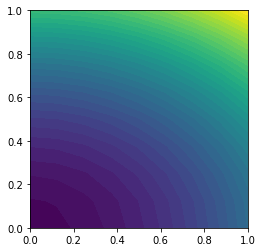

In [111]:
fenics.plot(u)

## Certify solution

In [112]:
compute_error = partial(fenics.errornorm, u=u_D, uh=u, mesh=mesh)

error_L2 = compute_error(norm_type="L2")
error_H1 = compute_error(norm_type="H1")

In [113]:
u_D_vertex = u_D.compute_vertex_values(mesh=mesh)
u_vertex = u.compute_vertex_values(mesh=mesh)

In [114]:
error_max = max(abs(u_D_vertex - u_vertex))

In [115]:
print("Errors", f"L2 = {error_L2}", f"H1 = {error_H1}", f"L8 = {error_max}", sep="\n")

Errors
L2 = 0.008235098073354827
H1 = 0.16158429226550816
L8 = 1.3322676295501878e-15


In [126]:
u.vector().get_local()

array([3.      , 2.53125 , 3.015625, 2.125   , 2.546875, 3.0625  ,
       1.78125 , 2.140625, 2.59375 , 3.140625, 1.5     , 1.796875,
       2.1875  , 2.671875, 3.25    , 1.28125 , 1.515625, 1.84375 ,
       2.265625, 2.78125 , 3.390625, 1.125   , 1.296875, 1.5625  ,
       1.921875, 2.375   , 2.921875, 3.5625  , 1.03125 , 1.140625,
       1.34375 , 1.640625, 2.03125 , 2.515625, 3.09375 , 3.765625,
       1.      , 1.046875, 1.1875  , 1.421875, 1.75    , 2.171875,
       2.6875  , 3.296875, 4.      , 1.015625, 1.09375 , 1.265625,
       1.53125 , 1.890625, 2.34375 , 2.890625, 3.53125 , 1.0625  ,
       1.171875, 1.375   , 1.671875, 2.0625  , 2.546875, 3.125   ,
       1.140625, 1.28125 , 1.515625, 1.84375 , 2.265625, 2.78125 ,
       1.25    , 1.421875, 1.6875  , 2.046875, 2.5     , 1.390625,
       1.59375 , 1.890625, 2.28125 , 1.5625  , 1.796875, 2.125   ,
       1.765625, 2.03125 , 2.      ])